In [48]:
import sys
import os
from pathlib import Path

import pickle
import json

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

BASE_DIR_ = '..'
if BASE_DIR_ != sys.path[-1]:
    sys.path.append(BASE_DIR_)
from cbir import BASE_DIR
os.chdir(BASE_DIR)

In [137]:
!ls saved_logs/original

hardnet_10_5_oxford results_BoW.txt     results_SV.txt
hardnet_10_5_paris  results_SV+QE.txt


In [181]:
# train_data = 'oxford'
# test_data = 'paris'
train_data = 'paris'
test_data = 'oxford'
now_parameters = f'hardnet_10_5_{train_data}'



original = 'original/'
# original = ''

# logs = 'logs/'
logs = 'saved_logs/'

path_answers = f'{logs}{original}{now_parameters}/answers.txt'
print(path_answers)

column_names = ['query', 'result', 'rank', 'similarity', 'sv', 'qe']
df = pd.read_csv(path_answers, header=None, names=column_names)

if original == 'original/':
    df['query'] = df['query'].apply(lambda query: str(Path(query).relative_to('/home/gavr/main/cbir-django/')) )
    df['result'] = df['result'].apply(lambda query: str(Path(query).relative_to('/home/gavr/main/cbir-django/')) )

saved_logs/original/hardnet_10_5_paris/answers.txt


In [182]:
df.head()

,query,result,rank,similarity,sv,qe
0,data/Buildings/Original/Oxford/jpg/all_souls_0...,data/Buildings/Original/Oxford/jpg/all_souls_0...,1,0,False,False
1,data/Buildings/Original/Oxford/jpg/all_souls_0...,data/Buildings/Original/Oxford/jpg/all_souls_0...,2,0,False,False
2,data/Buildings/Original/Oxford/jpg/all_souls_0...,data/Buildings/Original/Oxford/jpg/all_souls_0...,3,0,False,False
3,data/Buildings/Original/Oxford/jpg/all_souls_0...,data/Buildings/Original/Oxford/jpg/all_souls_0...,4,0,False,False
4,data/Buildings/Original/Oxford/jpg/all_souls_0...,data/Buildings/Original/Oxford/jpg/hertford_00...,5,0,False,False


In [183]:
print(df.shape)

(825, 6)


In [184]:
query_names = df['query'].unique().tolist()

In [185]:
query_names[:30]

['data/Buildings/Original/Oxford/jpg/all_souls_000013.jpg',
 'data/Buildings/Original/Oxford/jpg/ashmolean_000058.jpg',
 'data/Buildings/Original/Oxford/jpg/balliol_000051.jpg',
 'data/Buildings/Original/Oxford/jpg/bodleian_000107.jpg',
 'data/Buildings/Original/Oxford/jpg/christ_church_000179.jpg',
 'data/Buildings/Original/Oxford/jpg/cornmarket_000047.jpg',
 'data/Buildings/Original/Oxford/jpg/hertford_000015.jpg',
 'data/Buildings/Original/Oxford/jpg/keble_000245.jpg',
 'data/Buildings/Original/Oxford/jpg/magdalen_000078.jpg',
 'data/Buildings/Original/Oxford/jpg/pitt_rivers_000033.jpg',
 'data/Buildings/Original/Oxford/jpg/radcliffe_camera_000519.jpg',
 'data/Buildings/Original/Oxford/jpg/all_souls_000026.jpg',
 'data/Buildings/Original/Oxford/jpg/ashmolean_000000.jpg',
 'data/Buildings/Original/Oxford/jpg/balliol_000187.jpg',
 'data/Buildings/Original/Oxford/jpg/oxford_002416.jpg',
 'data/Buildings/Original/Oxford/jpg/oxford_002734.jpg',
 'data/Buildings/Original/Oxford/jpg/cornma

In [186]:
# query_name = query_names[0]

# df.loc[df['query'] == query_name, :]

# result_images = df.loc[df['query'] == query_name, 'result']

In [187]:
# plt.axis('off')
# plt.savefig("test.png", bbox_inches='tight')

# cur_axes = plt.gca()
# cur_axes.axes.get_xaxis().set_visible(False)
# cur_axes.axes.get_yaxis().set_visible(False)   

_______

In [188]:
df.head()

,query,result,rank,similarity,sv,qe
0,data/Buildings/Original/Oxford/jpg/all_souls_0...,data/Buildings/Original/Oxford/jpg/all_souls_0...,1,0,False,False
1,data/Buildings/Original/Oxford/jpg/all_souls_0...,data/Buildings/Original/Oxford/jpg/all_souls_0...,2,0,False,False
2,data/Buildings/Original/Oxford/jpg/all_souls_0...,data/Buildings/Original/Oxford/jpg/all_souls_0...,3,0,False,False
3,data/Buildings/Original/Oxford/jpg/all_souls_0...,data/Buildings/Original/Oxford/jpg/all_souls_0...,4,0,False,False
4,data/Buildings/Original/Oxford/jpg/all_souls_0...,data/Buildings/Original/Oxford/jpg/hertford_00...,5,0,False,False


In [189]:
df = df.loc[(df.sv == True ) & (df.qe == False), :]

In [190]:
# queries = [
#     'data/Buildings/Original/Paris/jpg/paris_defense_000605.jpg',
#     # ...
# ]
queries = query_names[20:25]

results = []
for query in queries:
    results += [[query] + df.loc[df['query'] == query, 'result'].tolist()]

In [191]:
results

[['data/Buildings/Original/Oxford/jpg/pitt_rivers_000119.jpg',
  'data/Buildings/Original/Oxford/jpg/pitt_rivers_000119.jpg',
  'data/Buildings/Original/Oxford/jpg/pitt_rivers_000087.jpg',
  'data/Buildings/Original/Oxford/jpg/pitt_rivers_000190.jpg',
  'data/Buildings/Original/Oxford/jpg/oxford_000585.jpg',
  'data/Buildings/Original/Oxford/jpg/jesus_000356.jpg'],
 ['data/Buildings/Original/Oxford/jpg/oxford_002904.jpg',
  'data/Buildings/Original/Oxford/jpg/oxford_002904.jpg',
  'data/Buildings/Original/Oxford/jpg/radcliffe_camera_000130.jpg',
  'data/Buildings/Original/Oxford/jpg/radcliffe_camera_000220.jpg',
  'data/Buildings/Original/Oxford/jpg/radcliffe_camera_000258.jpg',
  'data/Buildings/Original/Oxford/jpg/oxford_001122.jpg'],
 ['data/Buildings/Original/Oxford/jpg/oxford_002985.jpg',
  'data/Buildings/Original/Oxford/jpg/oxford_002985.jpg',
  'data/Buildings/Original/Oxford/jpg/all_souls_000091.jpg',
  'data/Buildings/Original/Oxford/jpg/oxford_002338.jpg',
  'data/Buildings/

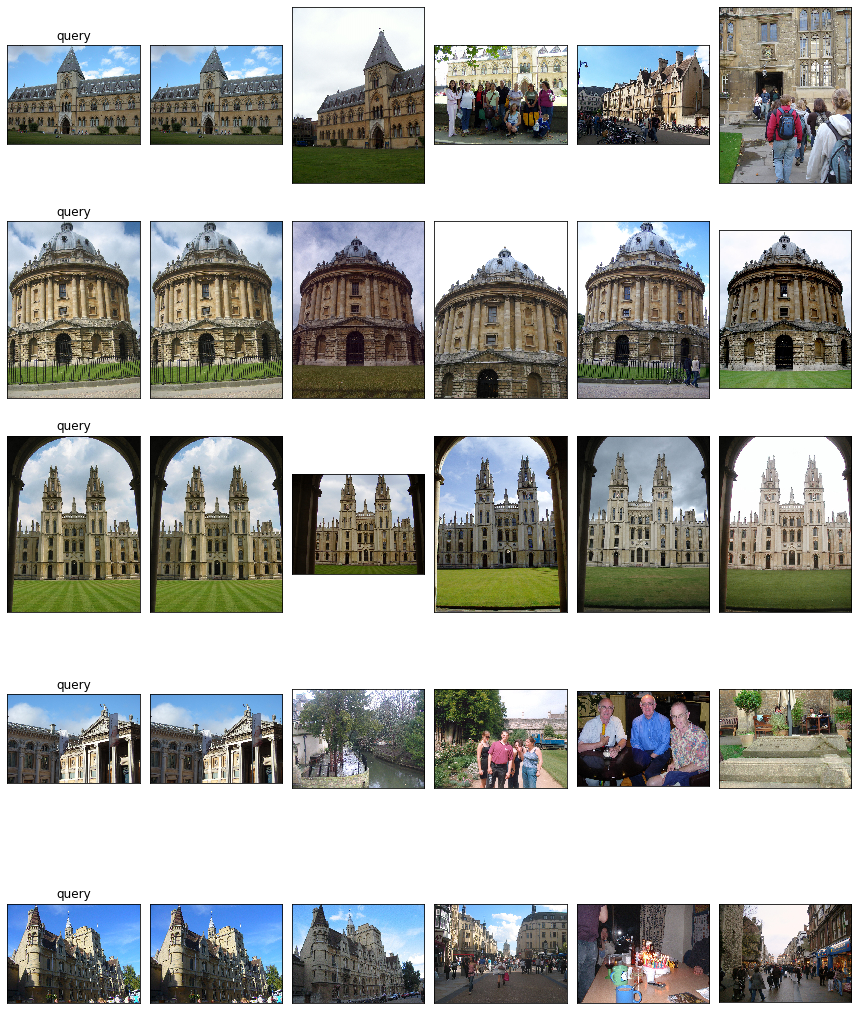

In [192]:
topk = 5
queries_count = len(queries)

nrows, ncols = queries_count, topk + 1
figsize = [ncols * 2, nrows * 3]
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, squeeze=False)

for i in range(nrows):
    query = results[i][0]
    img = Image.open(query)
    ax[i, 0].imshow(img)
    ax[i, 0].get_xaxis().set_visible(False)
    ax[i, 0].get_yaxis().set_visible(False)
    ax[i, 0].set_title('query')
    
    for j in range(1, topk + 1):
        try:
            img = Image.open(results[i][j])
            ax[i, j].imshow(img)
            rowid = i
            colid = j
            # ax[i, j].set_title(results[i][j])
            ax[i, j].get_xaxis().set_visible(False)
            ax[i, j].get_yaxis().set_visible(False)
            
        except FileNotFoundError:
            pass
        
plt.tight_layout(True)
plt.savefig(f'{test_data}_answers')
plt.show()